<h1 style="font-size:30px;">Pre-Trained Models in Keras Applications</h1>

Many well-known CNN models have been **pre-trained** on large benchmark datasets like **ImageNet**. The Deep Learning community has greatly benefited from these open-source models. Also, the pre-trained models are a major factor for rapid advances in Computer Vision research. Other researchers and practitioners can use these state-of-the-art models instead of re-inventing everything from scratch.

<img src='https://opencv.org/wp-content/uploads/2022/03/c4_03_VGG-16_pretrained.png' width=1000 align='center'><br/>

### What is ImageNet?
[ImageNet](http://www.image-net.org/) is a project which aims to provide a large image database for research purposes. It contains more than 1.2 million images comprising 1,000 classes (or synsets). They also provide bounding box annotations which can be used in Object Localization tasks. It should be noted that they only provide urls of images, and you need to download those images. For reference, here is the list of class labels for ImageNet <a href="https://image-net.org/challenges/LSVRC/2012/browse-synsets" target="_blank">ImageNet Class Labels.</a> 

### How Can We Use Pre-Trained Models?
We can use them right out-of-the-box for image classification or we can use them as a starting point for further training to fine-tune the for own custom dataset. Many of these State-of-the-Art models are already available through TensorFlow in the form of [Keras Applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications) or from [Tensorflow Hub](https://tfhub.dev/) which have been pre-trained on the ImageNet dataset. So, we can use them directly for many types of image classification tasks as long as the image classes in our dataset are also represented in the ImageNet dataset. 

In this Notebook, we will take a look at several models available in the Keras Applications API and explore how to use these models on our own images.

## Table of Contents

* [1 Pre-trained Classification Models in TensorFlow](#1-Pre\-Trained-Classification-Models-in-TensorFlow)
* [2 Using a Pre-Trained Model](#2-Using-a-Pre\-Trained-Model)
* [3 Model Comparison](#3-Model-Comparison)
* [4 Conclusion](#3-Conclusion)

In [1]:
import numpy as np
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

plt.style.use("seaborn")
block_plot = False

# Text formatting.
bold = "\033[1m"
end = "\033[0m"

C:\Users\Naveed Ul Mustafa\AppData\Local\Temp\ipykernel_1800\1992610273.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## 1 Pre-Trained Classification Models in TensorFlow

TensorFlow provides a host of pre-trained models through its <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications" target="_blank">`tf.keras.applications`</a> API. It contains image classification models that have been pre-trained on the ImageNet dataset. Let's now take a look at all the models available in TensorFlow's `keras.applications`.

In [2]:
all_modules = dir(tf.keras.applications)

# Navigate the tf.keras.applications namespace and display the available models.
for module in all_modules:
    if module[0].islower():
        if module != 'imagenet_utils':
            # Ignore imagenet_utils.
            print(f"Model Family: {bold}{module}{end}")
        if module == "mobilenet_v3":
            # Handel special case for mobilenet_v3.
            temp = "MobileNetV3Large"
            print(f"\t  |__ {temp}")
            temp = "MobileNetV3LSmall"
            print(f"\t  |__ {temp}")
        else:
            # General case.
            models = dir(getattr(tf.keras.applications, module))
            for model in models:
                if model[0].isupper():
                    print(f"\t  |__ {model}")
        print()

Model Family: convnext
	  |__ ConvNeXtBase
	  |__ ConvNeXtLarge
	  |__ ConvNeXtSmall
	  |__ ConvNeXtTiny
	  |__ ConvNeXtXLarge

Model Family: densenet
	  |__ DenseNet121
	  |__ DenseNet169
	  |__ DenseNet201

Model Family: efficientnet
	  |__ EfficientNetB0
	  |__ EfficientNetB1
	  |__ EfficientNetB2
	  |__ EfficientNetB3
	  |__ EfficientNetB4
	  |__ EfficientNetB5
	  |__ EfficientNetB6
	  |__ EfficientNetB7

Model Family: efficientnet_v2
	  |__ EfficientNetV2B0
	  |__ EfficientNetV2B1
	  |__ EfficientNetV2B2
	  |__ EfficientNetV2B3
	  |__ EfficientNetV2L
	  |__ EfficientNetV2M
	  |__ EfficientNetV2S


Model Family: inception_resnet_v2
	  |__ InceptionResNetV2

Model Family: inception_v3
	  |__ InceptionV3

Model Family: mobilenet
	  |__ MobileNet

Model Family: mobilenet_v2
	  |__ MobileNetV2

Model Family: mobilenet_v3
	  |__ MobileNetV3Large
	  |__ MobileNetV3LSmall

Model Family: nasnet
	  |__ NASNetLarge
	  |__ NASNetMobile

Model Family: regnet
	  |__ RegNetX002
	  |__ RegNetX004

Models are organized into model families. There are currently aronnd 60 models, ranging from very small models like `MobileNet`, model specifically designed for mobile or edge devices, to very large models like `ResNet152V2` or `InceptionResNetV2`, that are mainly designed for high accuracy but requires more computational resources and have slower inference time.

## 2 Using a Pre-Trained Model
To use any of the pre-trained models listed above, we need to follow a few simple steps:

1. Select a pre-trained model and specify the input size required by the model
2. Load a test image and resize it to the appropriate size based on the selected model
3. Pre-process the input image(s) using a dedicated pre-processing function that is accessible in the model, `preprocess_input()`
4. Call the model's `predict()` method to generate predictions
5. De-code the predictions using a dedicated post-processing function that is accessible in the model, `decode_predictions()`

### 2.1 Load and Display a Test Image

Let's first load and display a test image.

In [5]:
IMG_PATH = r"./test.jpg"

# Download a sample test image.
url = 'https://learnopencv.com/wp-content/uploads/2021/10/panda_test_image.jpg'

with open(IMG_PATH, 'wb') as f:
    r = requests.get(url, allow_redirects=True)
    f.write(r.content)

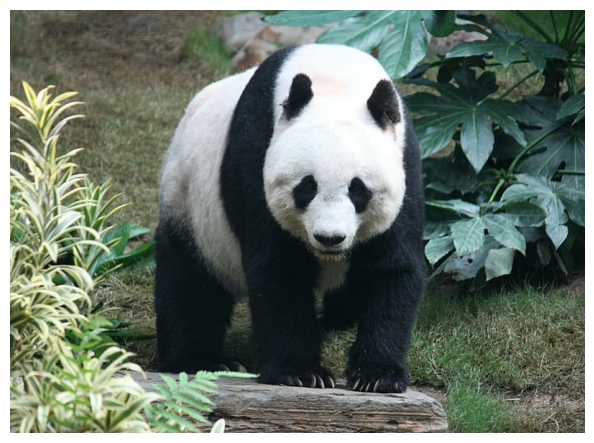

In [6]:
# Read and display the sample image.
IMG_PATH = r"./test.jpg"
image = plt.imread(IMG_PATH)

plt.imshow(image)
plt.axis("off")
plt.show(block=block_plot)

### 2.2 Select a Model and Specify the Required Input Size for the Model

In the code cell below we have provided a list of all the models available in the Keras Applications API along with the corresponding input image sizes required for each model. You can use this notebook to execute any of these models by simply uncommenting the appropriate `model_family` name and the `model_name` that you would like to use. Many of the models require an input shape of `(224, 224, 3)` but there are also several models that require a different input shape, so you will also need to specify the appropriate input image size, `IMG_SHAPE`, depending on the model you select.

Let's try classifying the image of the panda using the `MobileNetV3Small` model. 

In [3]:
# Specify the input image size based on the selected model.
IMG_SHAPE = (224, 224, 3) 

# model_family = "densenet"
# model_name = "DenseNet121"           # (224, 224, 3)
# model_name = "DenseNet169"           # (224, 224, 3)
# model_name = "DenseNet201"           # (224, 224, 3)

# model_family = "EfficientNet"
# model_name   = "EfficientNetB0"      # (224, 224, 3)
# model_name   = "EfficientNetB1"      # (240, 240, 3)
# model_name   = "EfficientNetB2"      # (260, 260, 3)
# model_name   = "EfficientNetB3"      # (300, 300, 3)
# model_name   = "EfficientNetB4"      # (380, 380, 3)
# model_name   = "EfficientNetB5"      # (456, 456, 3)
# model_name   = "EfficientNetB6"      # (528, 528, 3)
# model_name   = "EfficientNetB7"      # (600, 600, 3)

# model_family = "inception_resnet_v2"
# model_name   = "InceptionResNetV2"   # (299, 299, 3)

# model_family = "inception_v3"     
# model_name   = "InceptionV3"         # (299, 299, 3)

# model_family = "mobilenet"           
# model_name   = "MobileNet"           # (224, 224, 3)

# model_family = "mobilenet_v2"
# model_name   = "MobileNetV2"         # (224, 224, 3)

# model_family = "mobilenet_v3"
# model_name   = "MobileNetV3"         # (224, 224, 3)

model_family = "mobilenet_v3"
model_name   = "MobileNetV3Small"      # (224, 224, 3)
# model_name   = "MobileNetV3Large"    # (224, 224, 3)

# model_family = "nasnet"
# model_name   = "NASNetMobile"        # (224, 224, 3)

# model_family = "resnet"             
# model_name   = "ResNet101"           # (224, 224, 3)
# model_name   = "ResNet152"           # (224, 224, 3)
# model_name   = "ResNet50"            # (224, 224, 3)

# model_family = "resnet50"
# model_name   = "ResNet50"            # (224, 224, 3)

# model_family = "resnet_v2"
# model_name   = "ResNet101V2"         # (224, 224, 3)
# model_name   = "ResNet152V2"         # (224, 224, 3)
# model_name   = "ResNet50V2"          # (224, 224, 3)

# model_family = "vgg16"
# model_name   = "VGG16"               # (224, 224, 3)

# model_family = "vgg19"
# model_name   = "VGG19"               # (224, 224, 3)

# model_family = "xception"
# model_name   = "Xception"            # (299, 299, 3)

### 2.3 Loading an Image

In this section we develop a convenience function to load and resize the input image. Later in this module we will introduce a utility in Keras that allows you to easily process multiple images (`image_dataset_from_directory()`). For now, we will just use the function below to read and pre-process a single image. 

In [4]:
# convienoience function to load an resize the image according to model.

def load_image(image_path, img_shape):
    
    # Load the image.
    image = tf.io.read_file(IMG_PATH)
    
    # Convert the image from bytes to an image tensor.
    x = tf.image.decode_image(image, channels=img_shape[2])
    
    # Resize image to the input shape required by the model.
    x = tf.image.resize(x, (img_shape[0], img_shape[1]))
    
    # Add a dimension for an image batch representation.
    x = tf.expand_dims(x, axis=0)

    return x

In [7]:
# Load the image and re-shape the image tensor.
input = load_image(image_path=IMG_PATH, img_shape=IMG_SHAPE)
print("Shape: ", input.shape)                # 1 image x 224 width x 224 height x 3 color channels
print("Data type: ", input.dtype)
print("Min pixel value: ", tf.math.reduce_min(input).numpy())
print("Max pixel value: ", tf.math.reduce_max(input).numpy())

Shape:  (1, 224, 224, 3)
Data type:  <dtype: 'float32'>
Min pixel value:  0.0
Max pixel value:  255.0


### 2.4 Loading a Model

In [8]:
# This is a convenience function that loads any model available in the `tf.keras.applications`.
def load_model(input_shape, model_name):  
    
    # Models will be loaded wth pre-trainied `imagenet` weights.
    model = getattr(tf.keras.applications, model_name)(input_shape=input_shape, weights="imagenet")
    
    return model

### 2.5 Model Pre-Processing Function

Before an input image is passed to the model, it must first be pre-processed. Each model available in `tf.keras.applications` has a dedicated pre-processing function called `preprocess_input()`. This function is available in each model family's namespace. For example, the VGG-16 pre-processing function is accessed via the namespace: <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input" target="_blank">`tf.keras.applications.vgg16.preprocess_input`</a>. The function syntax is shown below, where `x` represents a floating point numpy.array or a tf.Tensor. Refer to the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications" target="_blank">`documentation`</a> for each model to learn more about the processing performed by `preprocess_input()`. 

```python
preprocess_input(x, data_format=None)
```

### 2.6 Model Decoding Function

Each model also comes with a helper function to decode the raw predictions from an ImageNet model to a human-readable format. This function is also accessed via the model's namespace. The first argument is a Numpy array encoding a batch of predictions (the output from the model's `predict()` function). The second argument is the number of predictions to decode, ranked by the highest probability score.

```python
predictions = decode_predictions(preds, top=5)
```

### 2.7 Processing Pipeline Function

In this section, we will now develop a convenience function that performs the following processing steps:

- Pre-process an input image using the model's `preprocess_input()` function
- Call the model's `predict()` method
- Decode the predictions using the model's `decode_predictions()` function

Each model generates the class probabilities of all 1,000 classes, but we're mainly interested in the highest-scoring class. However, it can be very informative to inspect the `top_k` classes to get a better sense for the model's robustness. So the optional argument `top_k` is included so that we can control the number of predictions produced by the model's `decode_predictions()` function. For example, if `top_k=5`, this means the function will show the top 5 predictions based on the top 5 probability scores.

In [9]:
def generate_predictions(input, model_family, model, top_k=3):
    
    # Initialize pre and post processing functions for the chosen model_family.
    preprocess  = getattr(tf.keras.applications, model_family).preprocess_input
    postprocess = getattr(tf.keras.applications, model_family).decode_predictions

    # Pre-process the input image.
    x = preprocess(input)

    # Generate predictions.
    preds = model.predict(x)

    # Print top_k predictions.
    post_preds = postprocess(preds, top=top_k)[0]

    print('Predicted')

    for i in post_preds:
        print(f"Class Description: {bold}{i[1]:<30}{end} Score: {bold}{i[2]}{end}")
    
    return preds

### 2.8 Perform Inference

To perform inference using the selected model, we will use the three functions we developed above.

1. `load_image()`
2. `load_model()`
3. `generate_predictions()`

In [10]:
# Load an image.
input = load_image(image_path=IMG_PATH, img_shape=IMG_SHAPE)

# Load the model.
pretrained_model = load_model(input_shape=IMG_SHAPE, model_name=model_name)

# Generate predictions.
predictions = generate_predictions(input=input,
                                       model_family=model_family,
                                       model=pretrained_model,
                                       top_k=5,
                                      )

1/1 [==============================] - 1s 732ms/step
Predicted
Class Description: giant_panda                    Score: 0.8280043601989746
Class Description: badger                         Score: 0.05239852890372276
Class Description: sloth_bear                     Score: 0.0034281876869499683
Class Description: colobus                        Score: 0.0026460771914571524
Class Description: American_Staffordshire_terrier Score: 0.002473267028108239


A shown in the results above, the **MobileNetV3Small** model is able to classify the image correctly as `giant_panda` with a 85% probability. As you can see, the next two predictions also make sense.

## 3 Model Comparison

As demonstrated above, using pre-trained models for image classification is very straightforward. Still, with so many models available, it's informative to compare the models based on various performance metrics. Besides model accuracy, inference speed and model size may also be very important considerations depending on the type of device the model will be running on and the type of application. In the following sections, we will compare models based on the following metrics.

1. **Top-1 Accuracy**:  The model answer (the one with highest probability) must be exactly the expected answer.
2. **Top-5 Accuracy**: Any of the model's top 5 highest probability answers must match the expected answer.
3. **Inference Time on CPU**: Inference time is the time taken for model inference step on CPU.
4. **Inference Time on GPU**: Inference time is the time taken for model inference step on GPU.
5. **Model size**: Here, size stands for the physical space occupied by the model weights file.

### 3.1 Accuracy Comparison of Models

**Top-1 Accuracy:** When the predicted top ranking class (the one with the highest probability) is the same as the ground-truth class. 

**Top-5 Accuracy:** A prediction is classified as correct, if **any** of the top-5 predicted classes matches the ground-truth class. Since ImageNet has so many classes, often very closely related, it is common to consider the top-5 predictions. This is still informative & often quoted in research papers.

<img src='https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_acc_compare.png' width=1000 align='center'><br/>

* Note how both metrics follow a similar trend. 
* The best model with respect to Top-1 and Top-5 accuracy is **`EfficientNet-B7`**

### 3.2 Inference Time Comparison

Next, we compare the models based on the time taken to perform inference (for both CPUs and GPUs). Time per inference step is computed based on the average of 30 batches and 10 repetitions. The data in the plots below were generated using the following:

* **Batch size**: 32
* **CPU**: AMD EPYC Processor (with IBPB) (92 core) 
* **GPU**: Tesla A100

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

<img src='https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_inf_speed_cpu.png' width=1000 align='center'><br/>

Some insights:

* MobileNet family models have the lowest inference times due to their stramline architectures. If application requires a model with a small footprint, fast inference time and tolerate slight reduction in accuracy, then MobileNet family models are a good choice.
* Though `EfficientNet-B7` is the most accurate, the inference time for this model is large
* `EfficientNet-B0` has a slightly lower accuracy compared to the larger models, but is able to perform inference about 10 times faster than `EfficientNet-B7`
* `MobileNetV2` has a similar accuracy compared to the `VGG-16` and `VGG-19` models but has a slightly lower inference time

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

<img src='https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_inf_speed_gpu.png' width=1000 align='center'><br/>

Some insights:

* When using a GPU, the infernce speed for all models is reduced significantly, but the greatest percentage reduction in inference speed is realized by the larger models. 

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### 3.3 Parameter and Model Size Comparison

* When we use a Deep Learning model on Edge devices, the model size is likely the deciding factor. At times, it is even more important than accuracy. 
* **MobileNetV3Small** has the smallest model size (`10 MB`), while **VGG-19** has the largest size (`549MB`).

<img src='https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_para_size_compare.png' width=1000 align='center'><br/>

### 3.4 MobileNet Model Comparison

The following plot compares the accuracy of the four different **MobileNet** models vs inference speed. The comparison was performed on the Pixel 1 (CPU) phone. Although this phone was released in 2016 it still gives you an idea of the relative performance among the models.


<img src='https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_mobilenet_compare.png' width=1000 align='center'><br/>

* MobileNet models are a class of efficient models created for mobile and embedded vision applications. 
* These models have a streamlined architecture that uses **depthwise separable convolutions** to build light weight deep neural networks. 
* MobileNet models are specifically designed to perform inference fast with a small memory footprint, which is ideal for edge devices, but these attributes come at a cost with lower accuracy.
* For their small size, these models perform quite well on ImageNet classification tasks compared to many other models that are quite a bit larger. 

**Note:** The bubble size corresponds to the model size.

### 3.5 Overall Comparison

Let’s now combine all these important details in one bubble chart for easy reference (for the larger size model architectures). 


<img src="https://learnopencv.com/wp-content/uploads/2021/10/c4_pretrained_overall_compare.png" width=1000 align='center'><br/>


**Note:**  The bubble size represents the relative CPU inference time. Annotations on the bubbles represent abbreviated model names and the numeric values indicate the CPU inference time in milliseconds.

## 4 Conclusion

In this notebook, we learned how to easily use any of the pre-trained models in the Keras Applications API for classification tasks. We also made several comparisons between the models based on efficiency (memory footprint and inference speed) and performance (Top-1 and Top-5) accuracy.